# Missing values:

### Ignoring Missing values rows/Deleting rows 

In [1]:
# importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing dataSet from  "train.csv"  file
dataSet = pd.read_csv("D:\\New Data Set for Practice\\train.csv")
dataSet.shape

(891, 12)

In [3]:
# showing all data in columns 
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [4]:
# Dataset in form data frame
dataSet.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
# dataframe.info() => use to get the information about the dataset. such as, 
# datatype 
# is null or not null 
# name of columns

dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# use to know the total Missing/NaN value 
dataSet.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Visualizing the original dataset

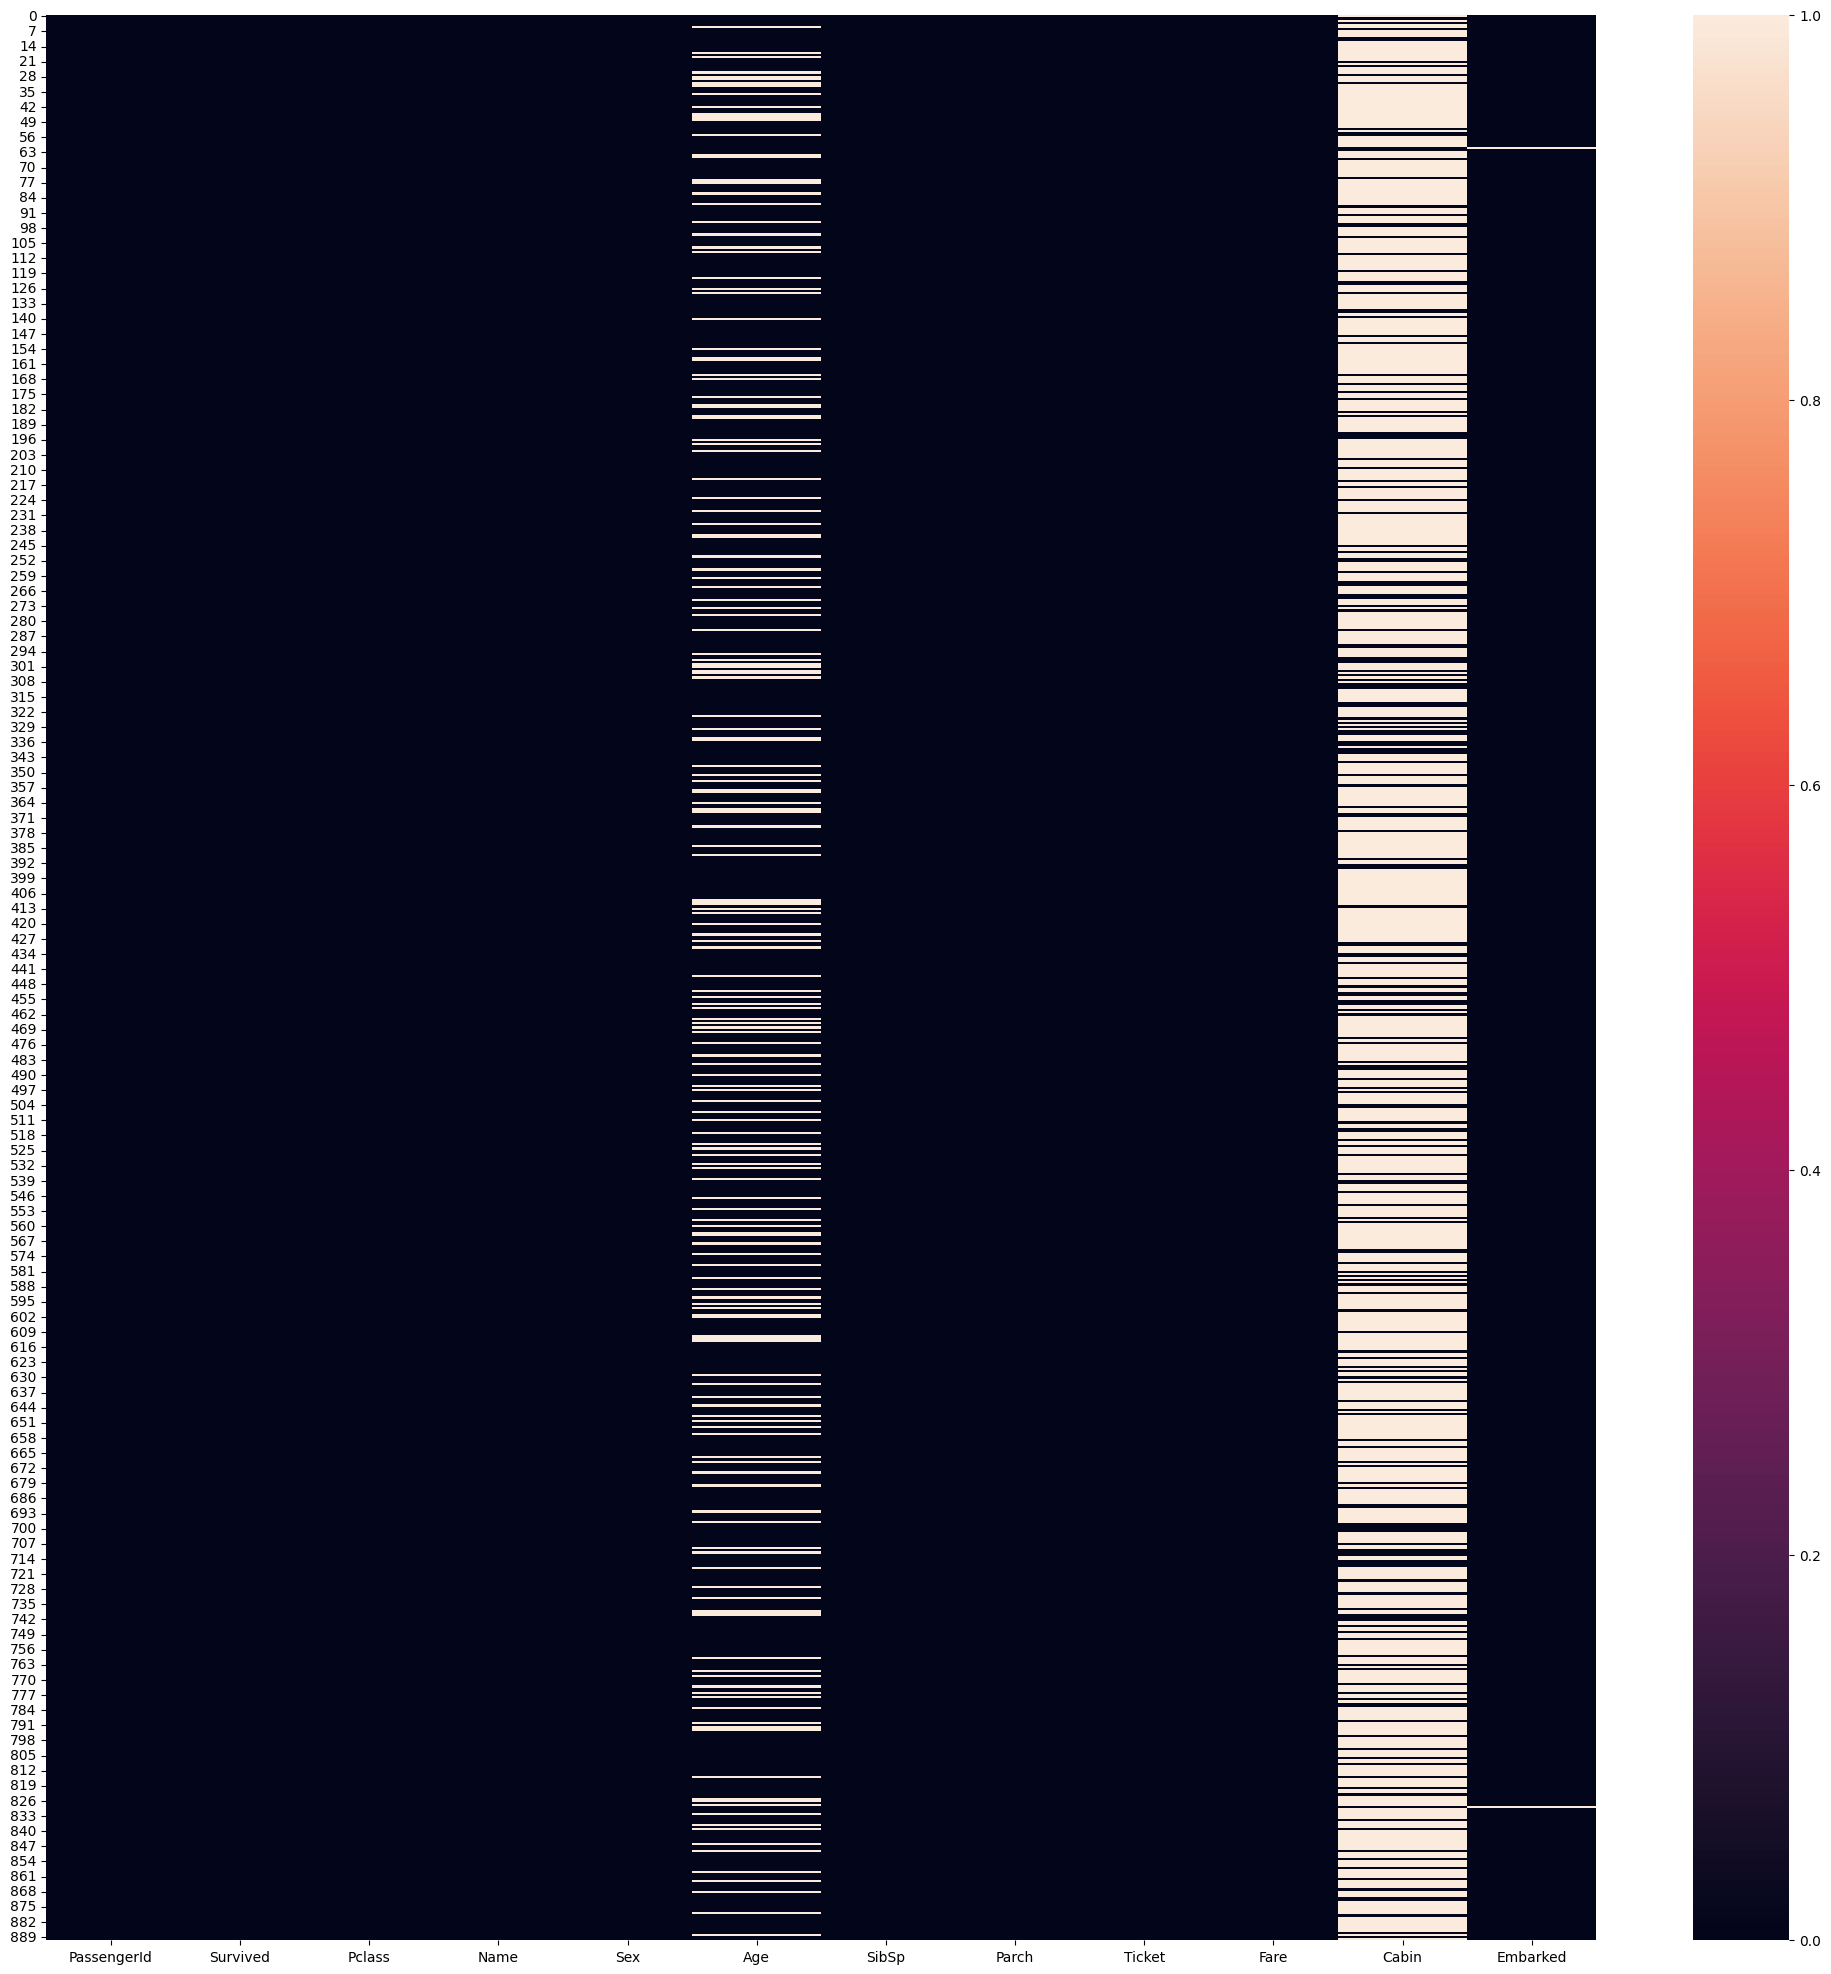

In [7]:
# Visualize the null value 
plt.figure(figsize=(25,25))
sns.heatmap(data = dataSet.isnull())
plt.show()

In [8]:
# finding percentage
NaN_value = dataSet.isnull().sum()/dataSet.shape[0]*100
print(NaN_value)   # Will Return Series
print(type(NaN_value))

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64
<class 'pandas.core.series.Series'>


In [9]:
# Finding the columns having NaN values more than 19%
Drop_values = NaN_value[NaN_value>19].keys()
Drop_values

Index(['Age', 'Cabin'], dtype='object')

## Drop columns with 20% missing value

In [10]:
# After droping the columns having NaN values more than 19% .
drop_colns = dataSet.drop(columns = Drop_values)
drop_colns.head(10)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,1,0,237736,30.0708,C


## Checking Missing values after removing impure columns 

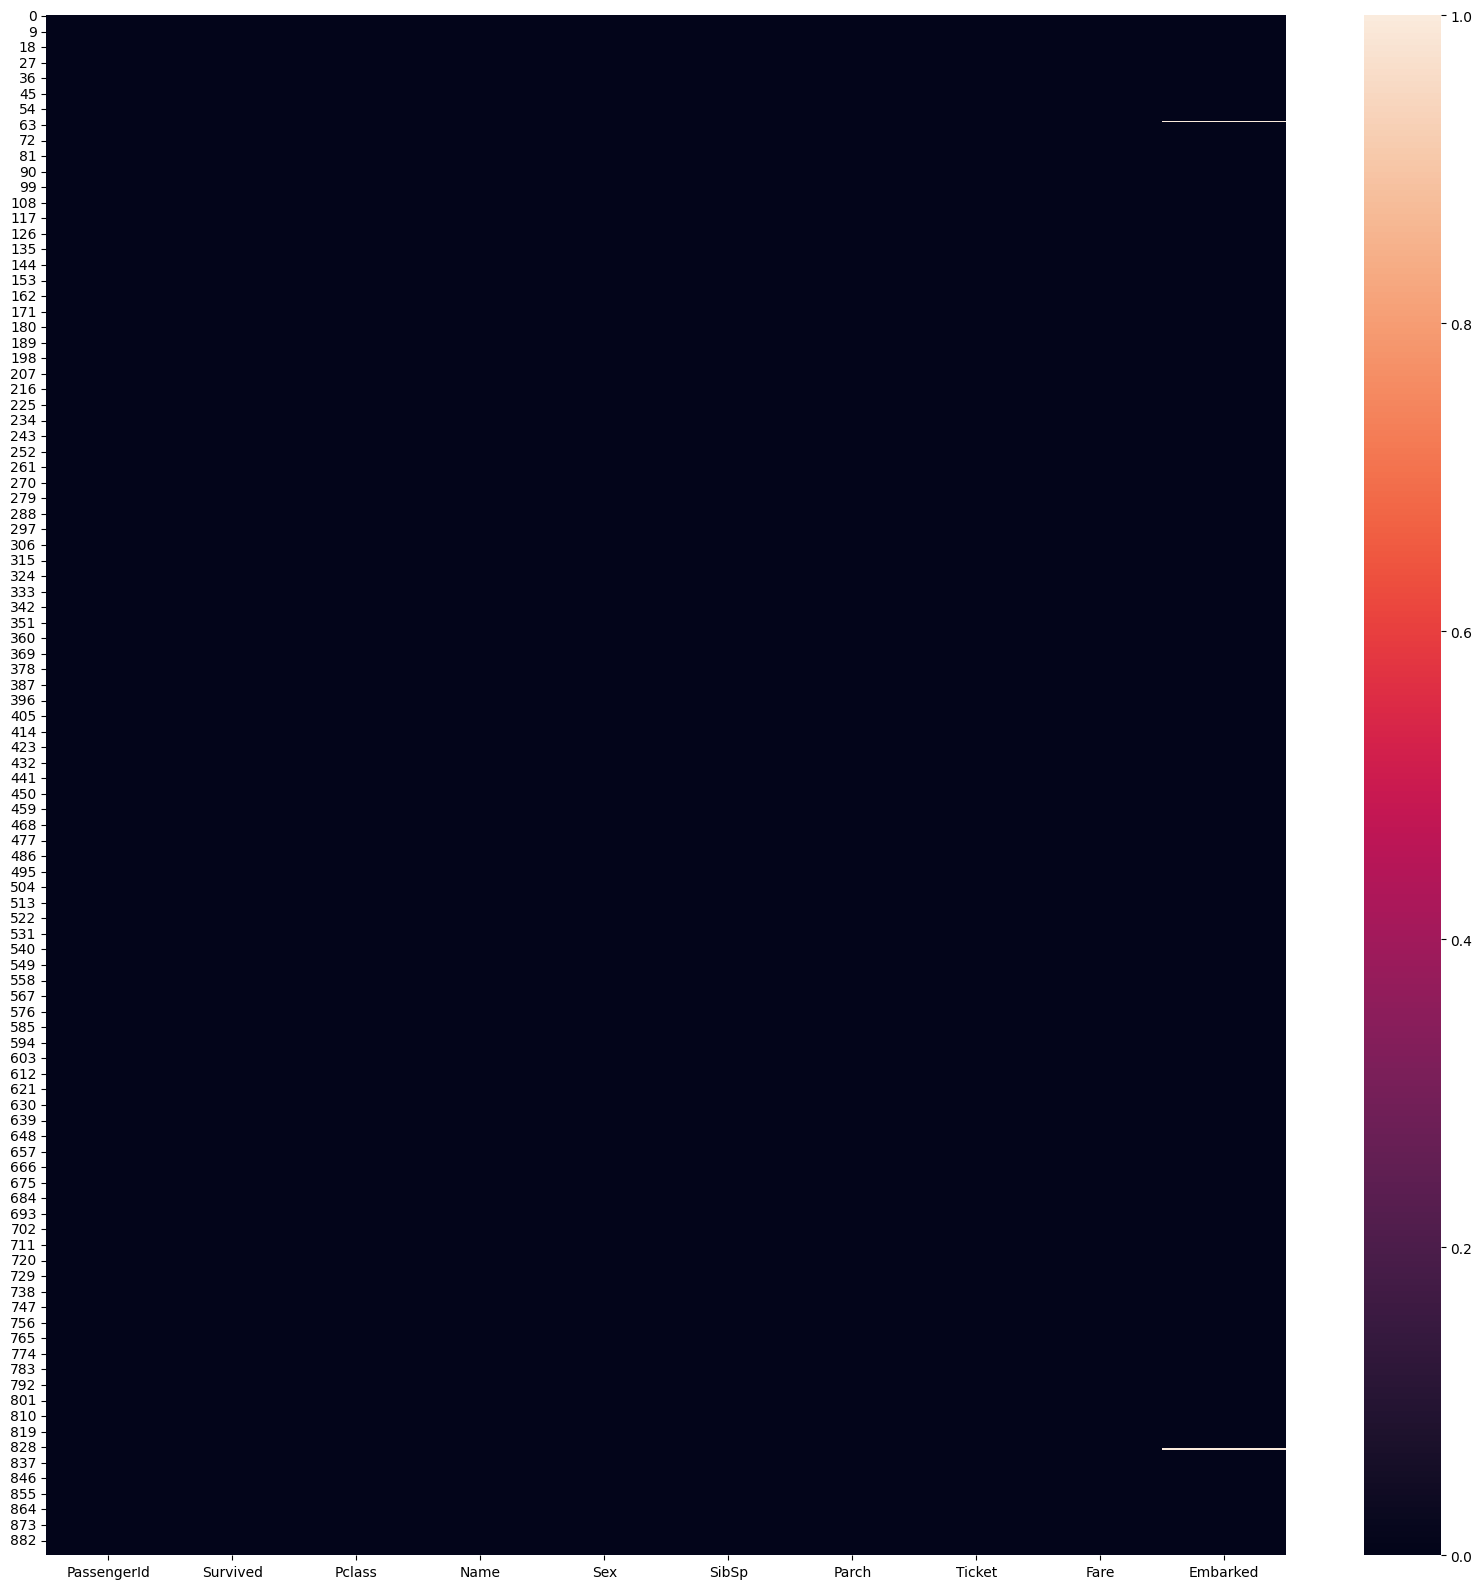

In [11]:
# Visualizing after Removing columns 
plt.figure(figsize=(20,20))
sns.heatmap(data=drop_colns.isnull())
plt.show()

In [12]:
# Checking how many NaN values are rest in DataSet
drop_colns.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

## Final Data

In [ ]:
# Now Removing the NaN rows
final_Data_set = drop_colns.dropna()
print("Comparing the shape original dataset with final dataset:\n",final_Data_set.shape,"\n",dataSet.shape)

final_Data_set.head(10)

## Visualizing the final data 

In [14]:
# Checking NaN value 
final_Data_set.isnull().sum()
# OUTPUT: 
#  PassengerId    0
#  Survived       0
#  Pclass         0
#  Name           0
#  Sex            0
#  SibSp          0
#  Parch          0
#  Ticket         0
#  Fare           0
#  Embarked       0
#  dtype: int64

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

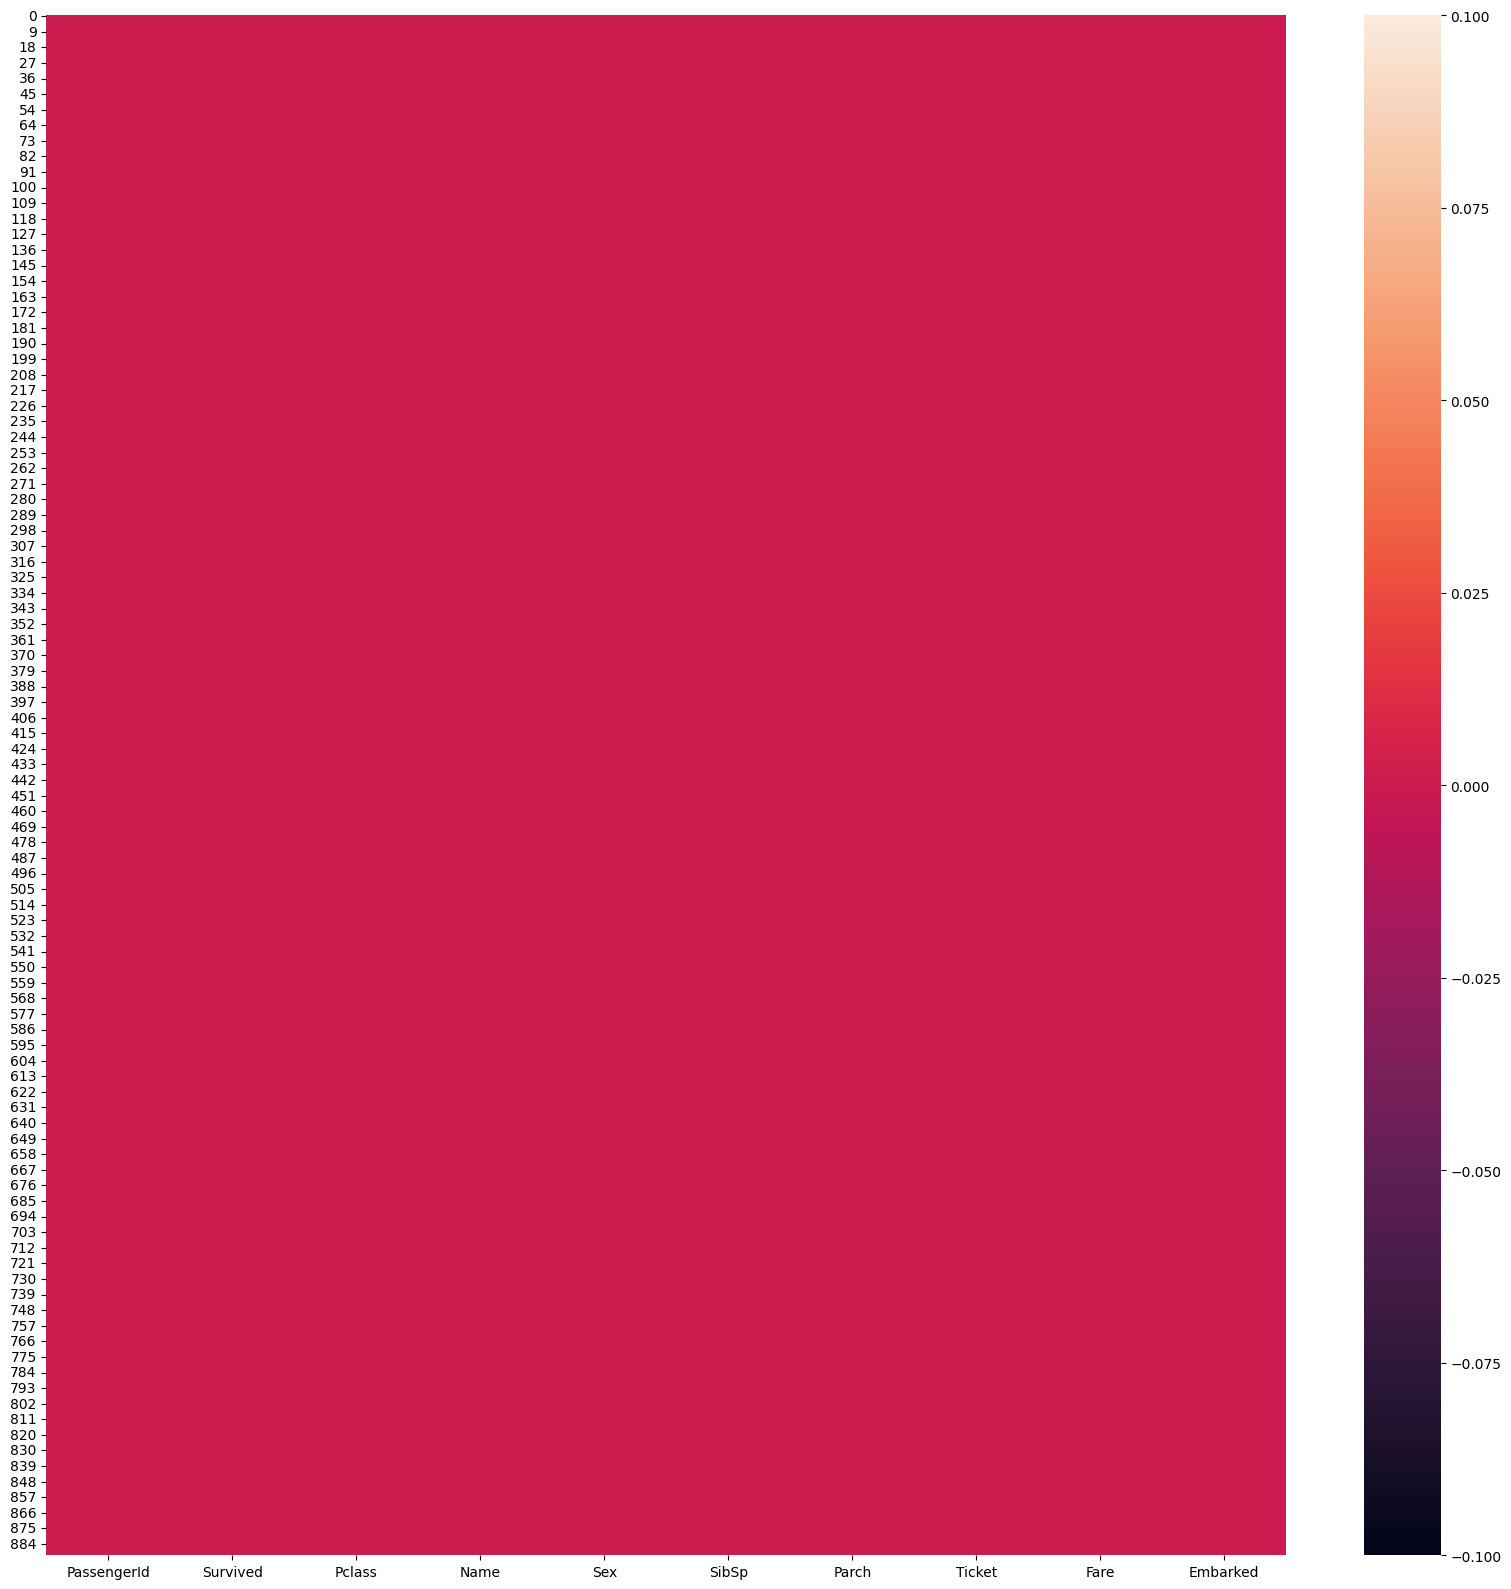

In [15]:
# Now visualize the final DataSet
plt.figure(figsize=(20,20))
sns.heatmap(data=final_Data_set.isnull())
plt.show()
# By visualizing the final data set their not any NaN value so data set is cleaned

## Visualizing the Numerical Data

In [33]:
# Selecting datatype of data
# final_Data_set.select_dtypes(include=["int64","float64"])  => return dataframe
# For integer and float 
data_colns_int = final_Data_set.select_dtypes(include=["int64","float64"]).columns
print("Integer: ",data_colns_int)
# For object Datatype
data_colns_catagory = final_Data_set.select_dtypes(include=["object"]).columns
print("Catagory: ",data_colns_catagory)
len(data_colns_int)

Integer:  Index(['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch', 'Fare'], dtype='object')
Catagory:  Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')


6

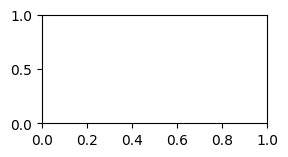

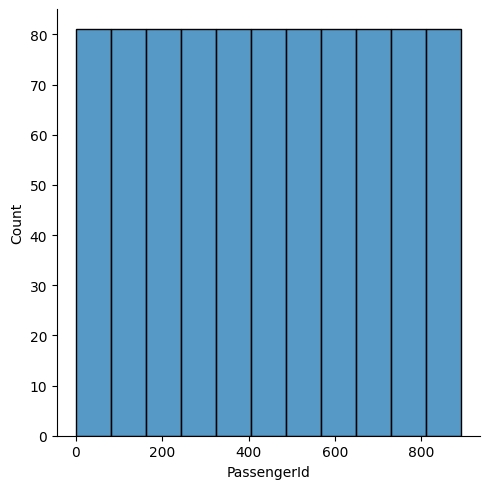

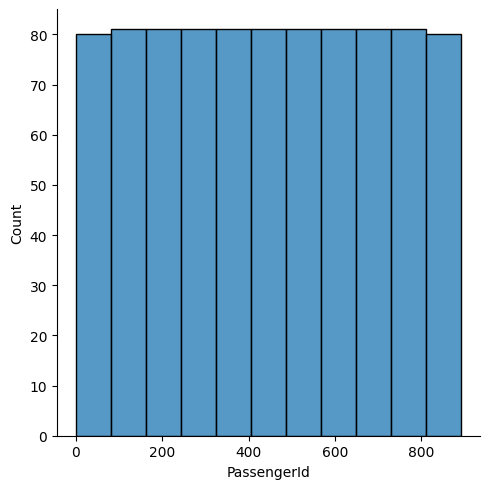

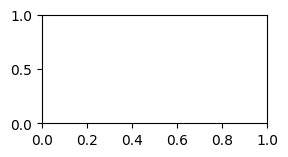

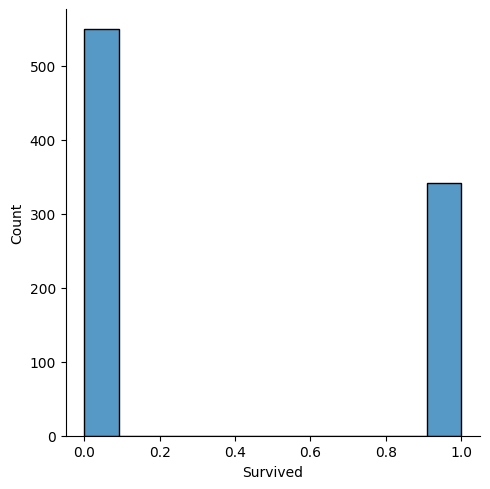

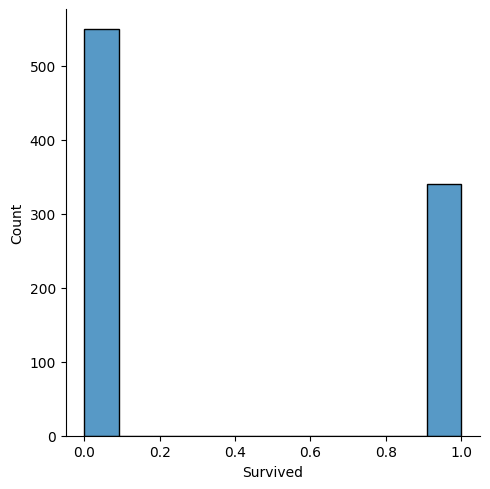

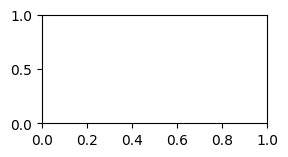

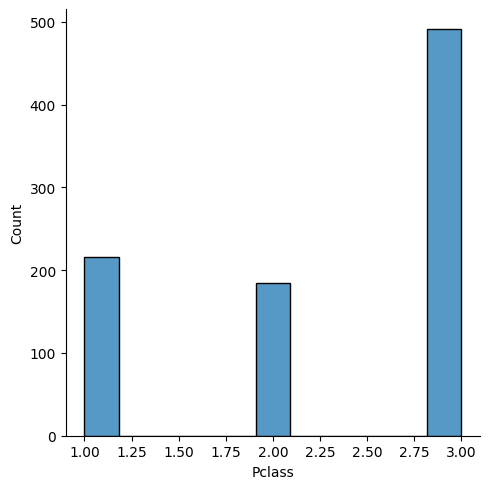

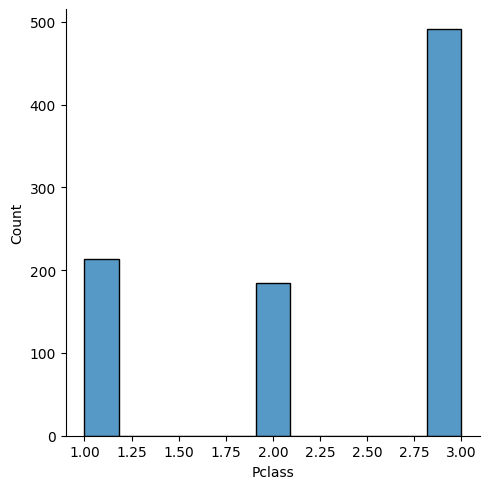

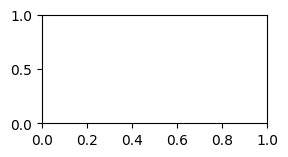

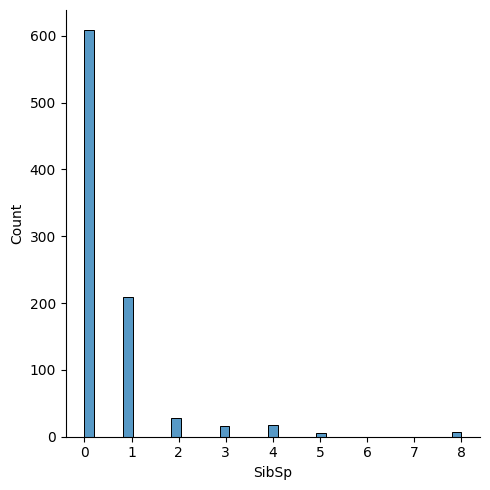

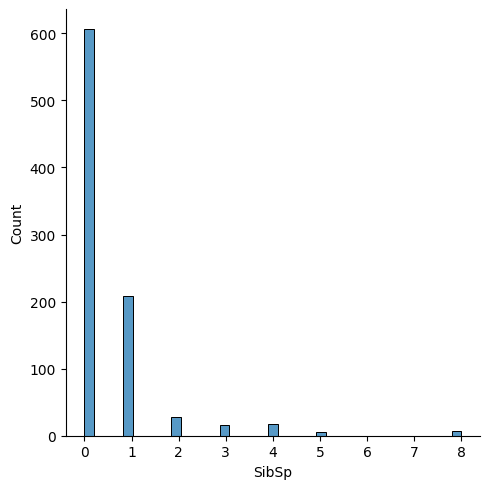

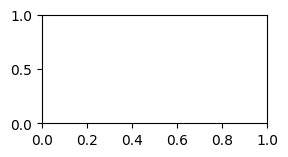

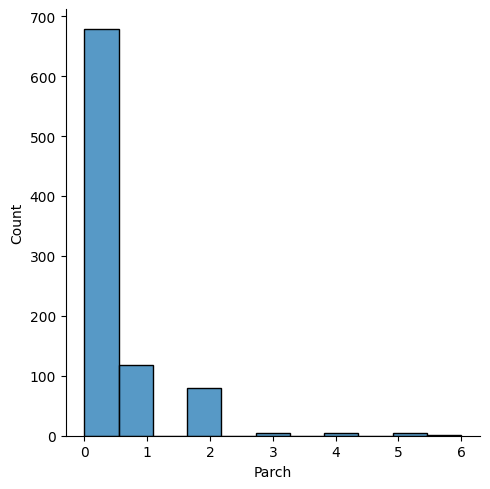

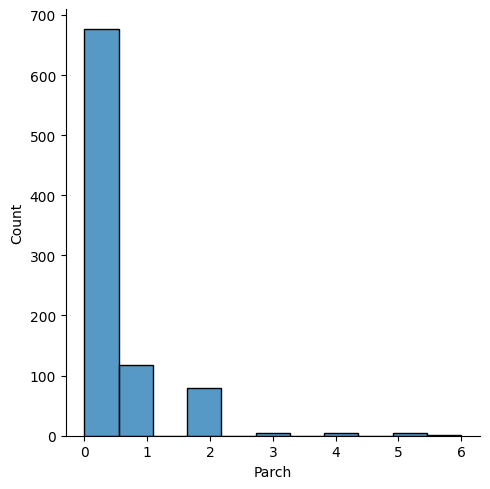

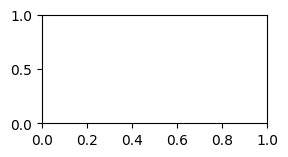

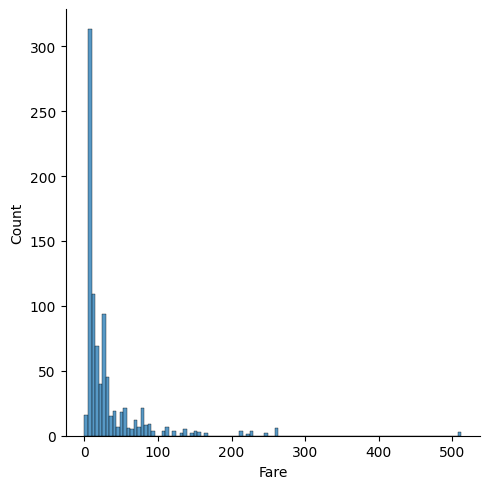

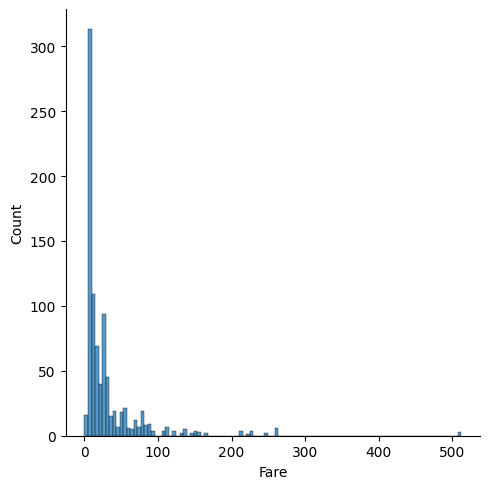

In [34]:
# visualize the the original data with final data  for integer DataType 
for i,var in enumerate(data_colns_int):
    plt.subplot(3,2,i+1,frameon=True)
    sns.displot(data=dataSet[var])
    sns.displot(data=final_Data_set[var])
    plt.show()

## Visualizing the categorical

In [56]:
# visualizing the categorical data by percentage   pd.concat(<list>,axis=<0/1>,keys=[<Name of Columns>]
category_Data = pd.concat(
            [dataSet[""].value_counts()/dataSet.shape[0]*100,
          final_Data_set["Sex"].value_counts()/final_Data_set.shape[0]*100],
          axis=1,keys=["Sex_original_data","Sex_final_data"])
category_Data

,Sex_original_data,Sex_final_data
Sex,,
male,64.758698,64.904387
female,35.241302,35.095613


In [54]:
# Function to visualize the Categorical Data
def Categorical_Data(data):
        return  (pd.concat(
            [dataSet[data].value_counts()/dataSet.shape[0]*100,
          final_Data_set[data].value_counts()/final_Data_set.shape[0]*100],
          axis=1,keys=[data+"_original_data",data+"_final_data"]))

In [55]:
print(data_colns_catagory)
for i in data_colns_catagory:
    print("\n")
    print(i.upper(),":")
    print(Categorical_Data(i))
    print("\n")

Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')


NAME :
                                                    Name_original_data  \
Name                                                                     
Dooley, Mr. Patrick                                           0.112233   
Braund, Mr. Owen Harris                                       0.112233   
Cumings, Mrs. John Bradley (Florence Briggs Tha...            0.112233   
Heikkinen, Miss. Laina                                        0.112233   
Futrelle, Mrs. Jacques Heath (Lily May Peel)                  0.112233   
Allen, Mr. William Henry                                      0.112233   
Moran, Mr. James                                              0.112233   
McCarthy, Mr. Timothy J                                       0.112233   
Palsson, Master. Gosta Leonard                                0.112233   
Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)             0.112233   
Nasser, Mrs. Nicholas (Adele Achem)       